# ECS784 Data Analytics Coursework 1

## Supervised Learning: Heart Disease Classification

Dataset provided by [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# 1. Data Dictionary

This table provides a description for each of the variables.

| Variable | Description |
| -------- | ----------- |
| Age | Age of the patient in years |
| Sex | Sex of the patient (M or F) |
| ChestPainType | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP | Resting blood pressure [mmHg] |
| Cholesterol | Serum cholesterol [mm/dl] |
| FastingBS | Fasting blood sugar [1 if FastingBS > 120 mg/dl, 0 if otherwise] | 
| RestingECG | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR | Maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina | Exercise-induced angina [Y: Yes, N: No] |
| Oldpeak | Oldpeak = ST [Numeric value measured in depression] |
| ST_Slope | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease | Output class [1: heart disease, 0: Normal] |

# 2. Exploratory Data Analysis

## 2.1 DataFrame Preparation

In [238]:
# imports all modules needed to read and manipulate the data
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# prevents warnings from happening
import warnings 
warnings.simplefilter('ignore', category=UserWarning)

# makes plots pretty in jupyternotebook
%matplotlib inline

# loads the dataset from the file heart.csv into a DataFrame
df = pd.read_csv('heart.csv')

In [246]:
# uses df.shape to calculate the number of rows and columns 
print(f"The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# displays the columns and their associated non-null counts, dtypes, and indexes
df.info()

The DataFrame contains 918 rows and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [247]:
print('The first five rows of the DataFrame are as follows:')

# displays the first five rows of the DataFrame
df.head()

The first five rows of the DataFrame are as follows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [249]:
print("The following 7 variables are continuous (numerical):\n")

# provides general statistical information about the continuous (numerical) variables in the DataFrame
df.describe()

The following 7 variables are continuous (numerical):



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 2.2 Categorical (Discrete) Variables

It is worth mentioning that the predicted variable 'HeartDisease' and another feature variable 'FastingBS' are also categorical. However, the dataset already stores the values of these variables as '0' or '1' instead of 'yes' or 'no'. For that reason, they do not show up with the following command.

In [250]:
print('The following 5 variables are categorical (discrete):\n')

# provides general statistical information about the discrete (categorical) variables in the DataFrame
df.describe(include='object')

The following 5 variables are discrete (categorical):



,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Distributions of Categorical Variables

Comparing the bar plots of each variable side-by-side, it is easy to see that none of the variables is equally distributed. For example, the variable 'Sex' contains far more males than females.

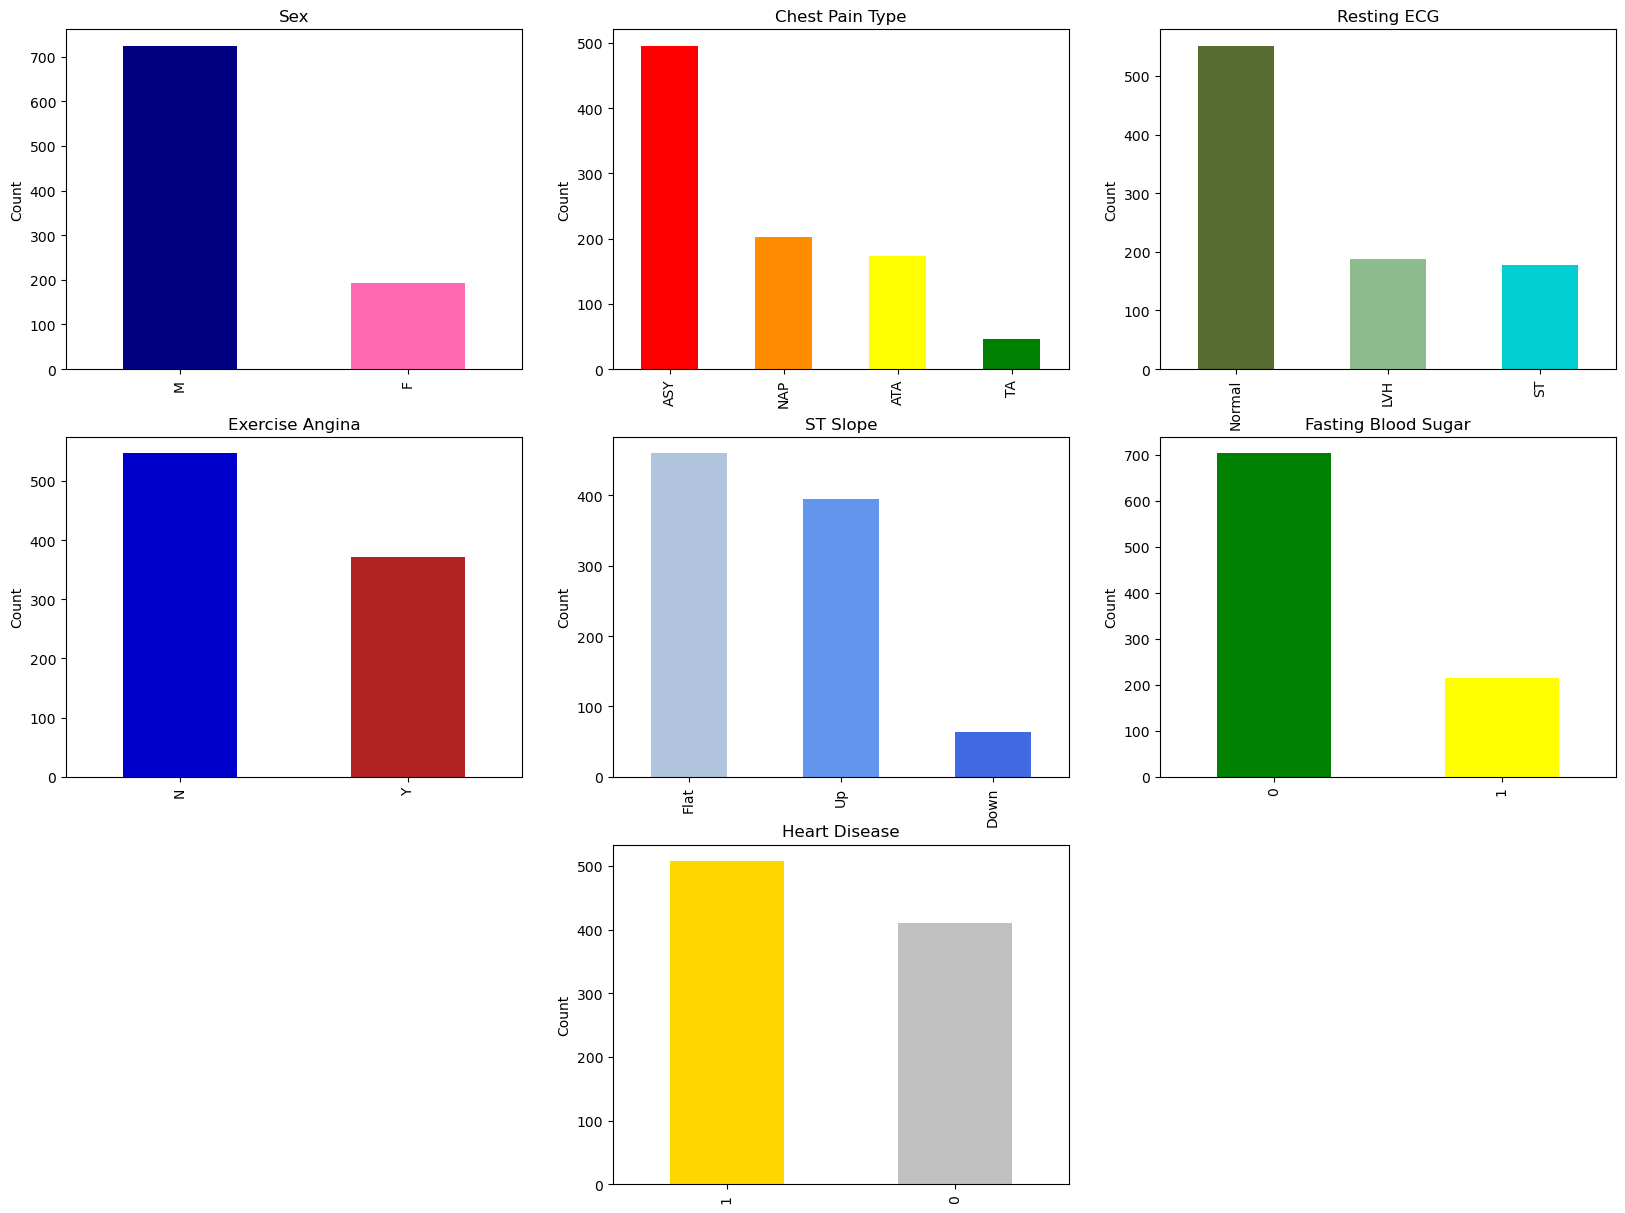

In [311]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15))
df['Sex'].value_counts().plot(ax = axes[0, 0], kind = 'bar', title = 'Sex', color = ['navy', 'hotpink'], ylabel = 'Count')

df['ChestPainType'].value_counts().plot(ax = axes[0, 1], kind = 'bar', title = 'Chest Pain Type', color = ['red', 'darkorange', 'yellow', 'green'], ylabel = 'Count')

df['RestingECG'].value_counts().plot(ax = axes[0, 2], kind = 'bar', title = 'Resting ECG', color = ['darkolivegreen', 'darkseagreen', 'darkturquoise'], ylabel = 'Count')

df['ExerciseAngina'].value_counts().plot(ax = axes[1, 0], kind = 'bar', title = 'Exercise Angina', color = ['mediumblue', 'firebrick'], ylabel = 'Count')

df['ST_Slope'].value_counts().plot(ax = axes[1, 1], kind = 'bar', title = 'ST Slope', color = ['lightsteelblue', 'cornflowerblue', 'royalblue'], ylabel = 'Count')

df['FastingBS'].value_counts().plot(ax = axes[1, 2], kind = 'bar', title = 'Fasting Blood Sugar', color = ['green', 'yellow'], ylabel = 'Count')

# adding the predicted variable 'HeartDisease' for easy comparison
df['HeartDisease'].value_counts().plot(ax = axes[2, 1], kind = 'bar', title = 'Heart Disease', color = ['gold', 'silver'], ylabel = 'Count')

fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 2])

### Bivariate Analysis of Categorical Variables

## 2.3 Numerical (Continuous) Variables

In [214]:
# Displays the continous variables once again
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Distributions of Continuous Variables

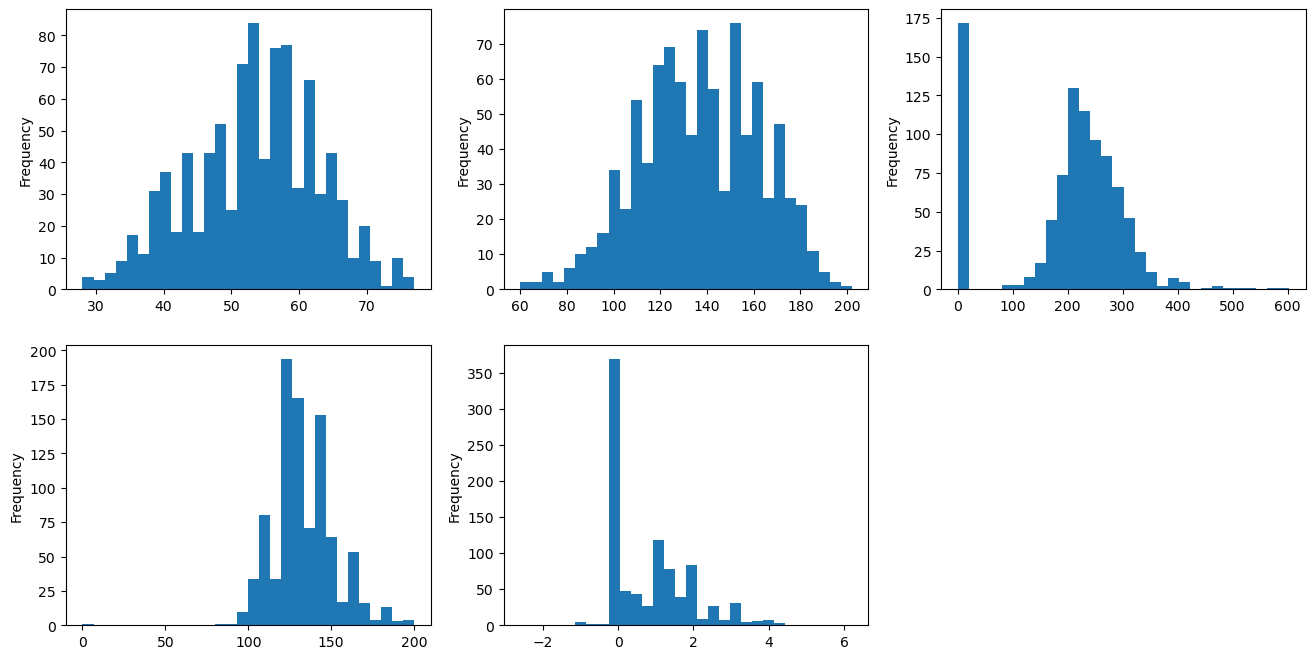

In [390]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,8)) 
df['Age'].plot(kind = 'hist', bins = 30, ax = axes[0, 0])
df['MaxHR'].plot(kind = 'hist', bins = 30, ax = axes[0, 1])
df['Cholesterol'].plot(kind = 'hist', bins = 30, ax = axes[0, 2])
df['RestingBP'].plot(kind = 'hist', bins = 30, ax = axes[1, 0])
df['Oldpeak'].plot(kind = 'hist', bins = 30, ax = axes[1, 1])
fig.delaxes(axes[1, 2])
plt.show()

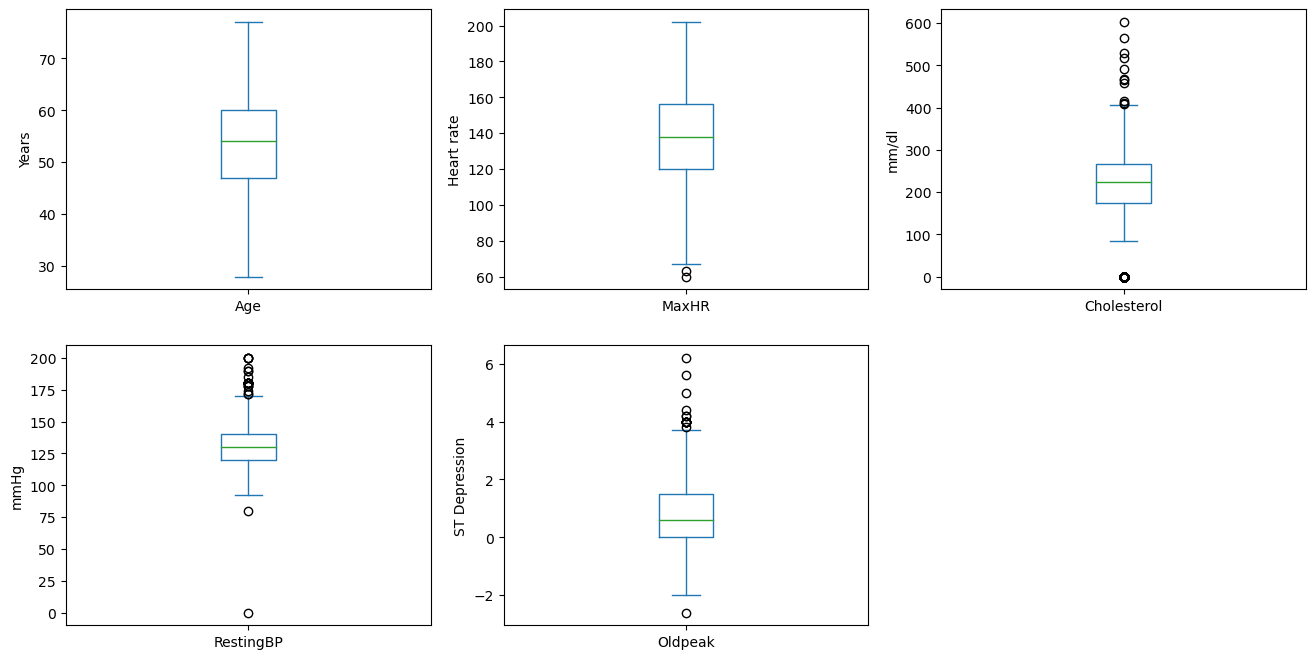

In [368]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 8)) 
df['Age'].plot(kind='box', ax=axes[0, 0], ylabel='Years')
df['MaxHR'].plot(kind='box', ax=axes[0, 1], ylabel='Heart rate')
df['Cholesterol'].plot(kind='box', ax=axes[0, 2], ylabel='mm/dl')
df['RestingBP'].plot(kind='box', ax=axes[1, 0], ylabel='mmHg')
df['Oldpeak'].plot(kind='box', ax=axes[1, 1], ylabel='ST Depression')
fig.delaxes(axes[1, 2])
plt.show()

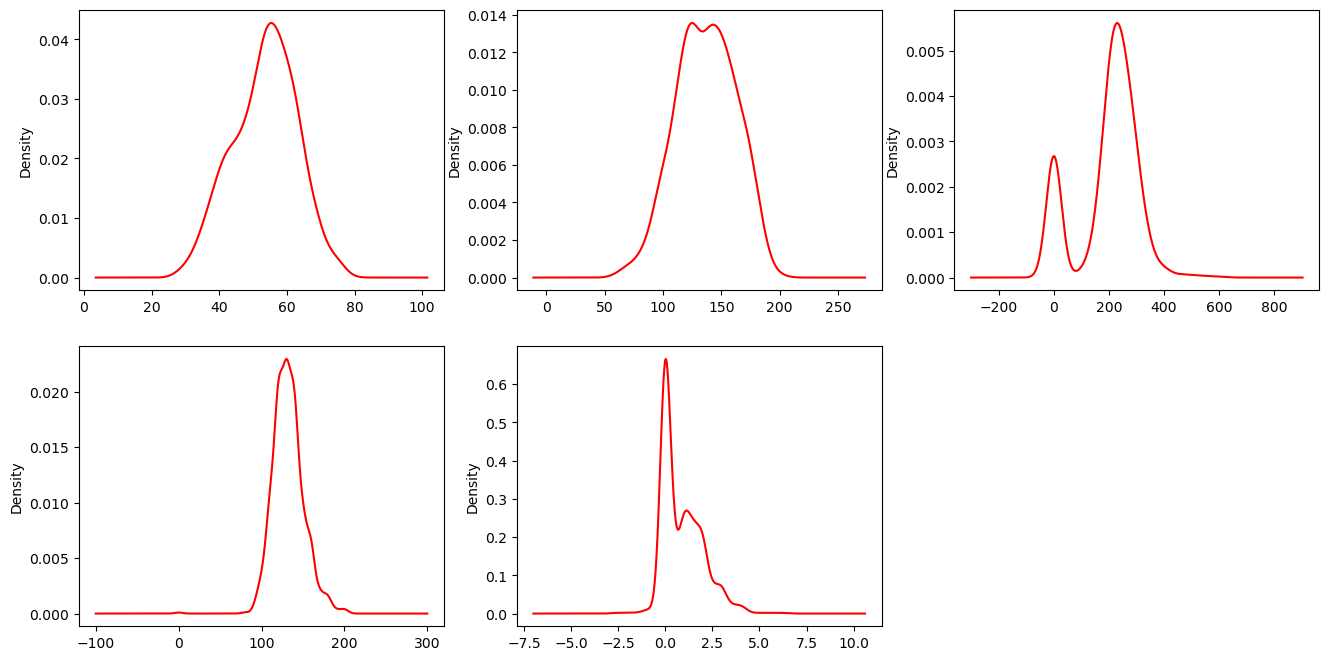

In [369]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 8))
df['Age'].plot(kind='density', color='r', ax=axes[0, 0])
df['MaxHR'].plot(kind='density', color='r', ax=axes[0, 1])
df['Cholesterol'].plot(kind='density', color='r', ax=axes[0, 2])
df['RestingBP'].plot(kind='density', color='r', ax=axes[1, 0])
df['Oldpeak'].plot(kind='density', color='r', ax=axes[1, 1])
fig.delaxes(axes[1, 2])
plt.show()

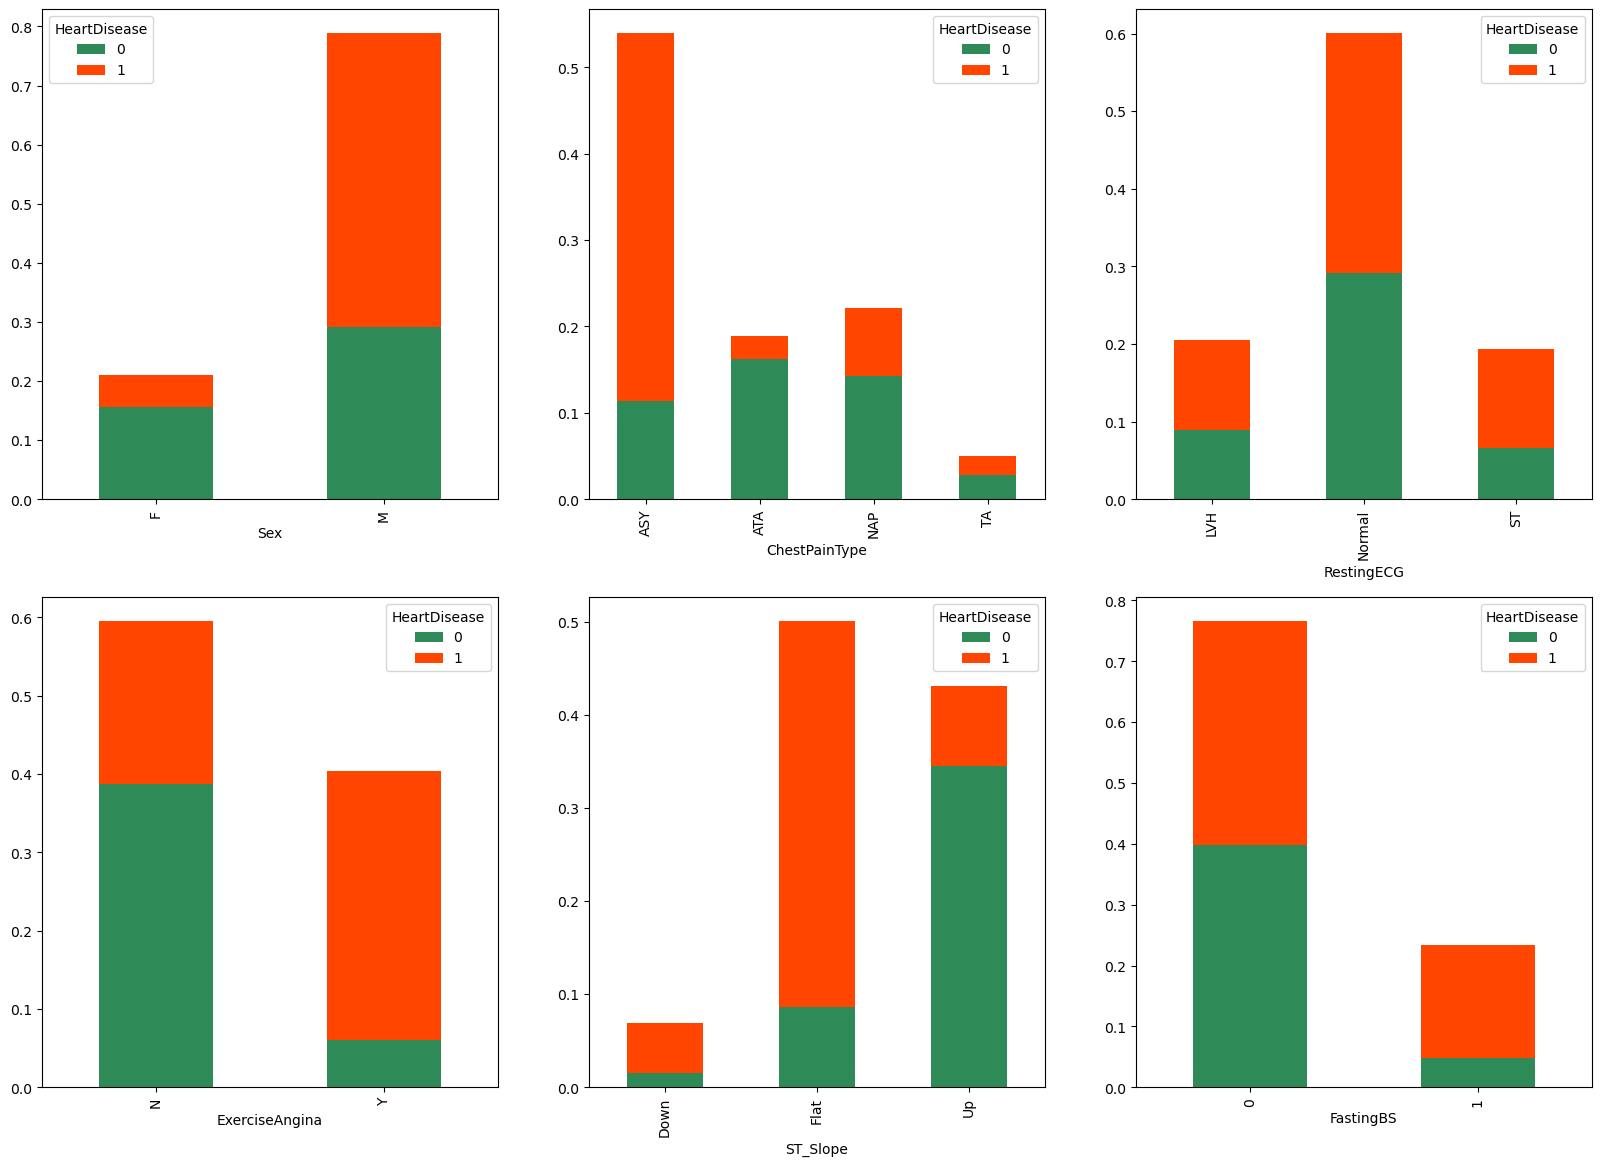

In [420]:
sex_vs_hd = pd.crosstab(df['Sex'], df['HeartDisease'], normalize = True)
cpt_vs_hd = pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize = True)
ecg_vs_hd = pd.crosstab(df['RestingECG'], df['HeartDisease'], normalize = True)
ang_vs_hd = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize = True)
sts_vs_hd = pd.crosstab(df['ST_Slope'], df['HeartDisease'], normalize = True)
fbs_vs_hd = pd.crosstab(df['FastingBS'], df['HeartDisease'], normalize = True)

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 14))
sex_vs_hd.plot(ax = axes[0, 0], kind = 'bar', color = ['seagreen', 'orangered'], stacked = True)
cpt_vs_hd.plot(ax = axes[0, 1], kind = 'bar', color = ['seagreen', 'orangered'], stacked = True)
ecg_vs_hd.plot(ax = axes[0, 2], kind = 'bar', color = ['seagreen', 'orangered'], stacked = True)
ang_vs_hd.plot(ax = axes[1, 0], kind = 'bar', color = ['seagreen', 'orangered'], stacked = True)
sts_vs_hd.plot(ax = axes[1, 1], kind = 'bar', color = ['seagreen', 'orangered'], stacked = True)
fbs_vs_hd.plot(ax = axes[1, 2], kind = 'bar', color = ['seagreen', 'orangered'], stacked = True)

plt.show()

### Bivariate Analysis of Continuous Variables

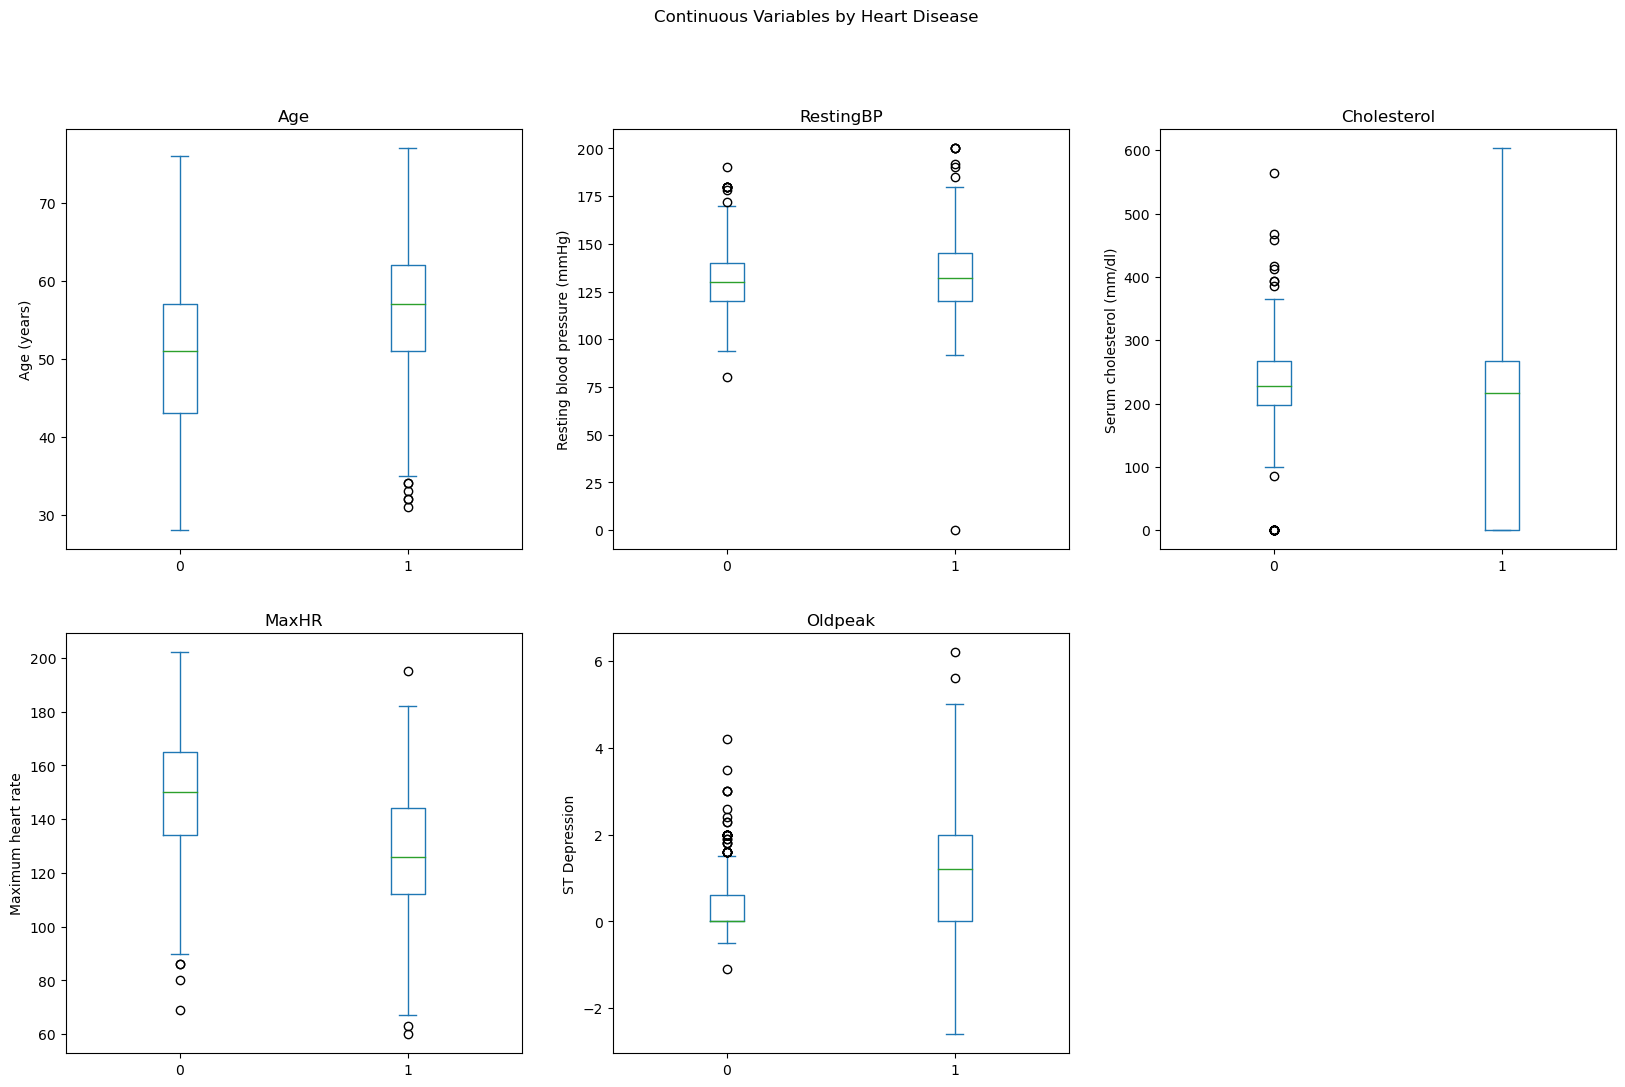

In [434]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12))
df.plot(ax = axes[0, 0], column = 'Age', by = 'HeartDisease', kind = 'box', ylabel = 'Age (years)', title = 'Continuous Variables by Heart Disease')
df.plot(ax = axes[0, 1], column = 'RestingBP', by = 'HeartDisease', kind = 'box', ylabel = 'Resting blood pressure (mmHg)')
df.plot(ax = axes[0, 2], column = 'Cholesterol', by = 'HeartDisease', kind = 'box', ylabel = 'Serum cholesterol (mm/dl)')
df.plot(ax = axes[1, 0], column = 'MaxHR', by = 'HeartDisease', kind = 'box', ylabel = 'Maximum heart rate')
df.plot(ax = axes[1, 1], column = 'Oldpeak', by = 'HeartDisease', kind = 'box', ylabel = 'ST Depression')
fig.delaxes(axes[1,2])
plt.show()

In [ ]:
df.groupby('HeartDisease')['Age'].mean().plot(kind = 'bar', ylabel = 'Mean of Age', figsize = (5, 4))
plt.show()

## 3. Preprocessing

The dataset contains no null values, thankfully.

In [224]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [225]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Convert all categorical variables to integers so that the algorithms can better use them.

In [226]:
df['Sex'] = df['Sex'].astype('category').cat.codes
df['ChestPainType'] = df['ChestPainType'].astype('category').cat.codes
df['RestingECG'] = df['RestingECG'].astype('category').cat.codes 
df['ExerciseAngina'] = df['ExerciseAngina'].astype('category').cat.codes 
df['ST_Slope'] = df['ST_Slope'].astype('category').cat.codes

In [227]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### 4. Feature Selection

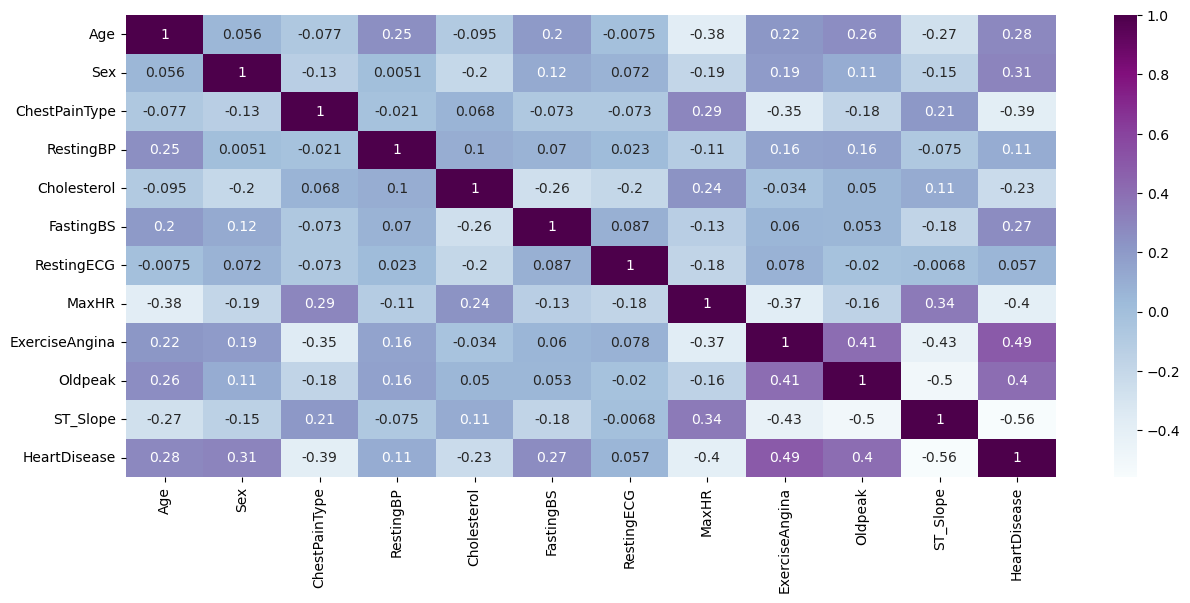

In [228]:
corr=df.corr()
plt.figure(figsize=(15,6)) 
sns.heatmap(corr, annot = True, cmap = 'BuPu')
plt.show()

In [229]:
X = df.drop(['HeartDisease'], axis=1) 
y = df['HeartDisease']

In [230]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif 

ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X, y) 
ftest_sorted = pd.Series(data = ftest.scores_, index = X.columns).sort_values() 

mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X, y) 
mitest_sorted = pd.Series(data = mitest.scores_, index = X.columns).sort_values()

In [231]:
from sklearn.ensemble import ExtraTreesClassifier 

xtrees = ExtraTreesClassifier().fit(X, y) 
xtrees_sorted = pd.Series(data = xtrees.feature_importances_, index = X.columns).sort_values() 

from sklearn.feature_selection import mutual_info_classif 

muinfo = mutual_info_classif(X, y)
muinfo_sorted = pd.Series(data = muinfo, index = X.columns).sort_values() 

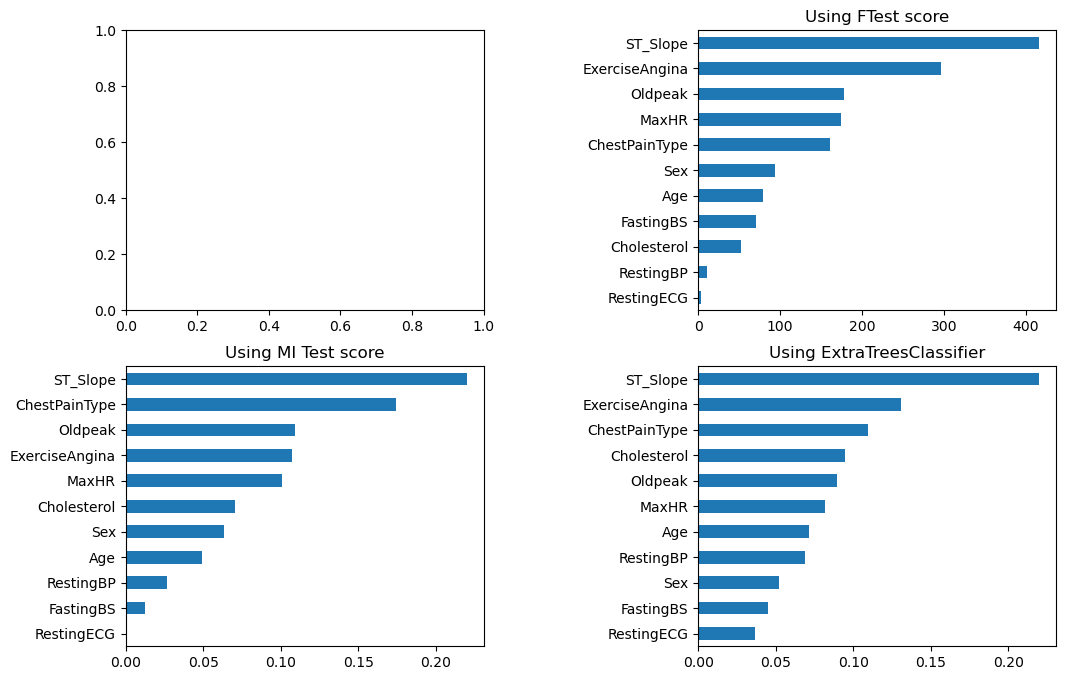

In [232]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8)) 
plt.subplots_adjust(wspace = 0.6) 
ftest_sorted.plot(kind='barh', ax=axes[0, 1], title='Using FTest score')
xtrees_sorted.plot(kind='barh', ax=axes[1, 1], title='Using ExtraTreesClassifier')
mitest_sorted.plot(kind='barh', ax=axes[1, 0], title='Using MI Test score')
plt.show()

### 5. Prediction and Evaluation

In [233]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix 
import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)

In [234]:
def train_and_evaluate(model, X, y):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy metrics
    # and not use it to train the model. This is good practice, particularly when you are
    # using cross-validation to select model parameters ... that way, the characteristics
    # of the test data don't leak into the model training
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cross-validation accuracy gives an indication of variation in accuracy and a better
    # estimate for overall accuracy than just a single estimate. The mean cross-validation
    # accuracy is therefore a better guide when selecting model parameters or comparing models
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    # Fit model using all of the reserved training data ... look at training accuracy 
    # which we generally expect to be better than test accuracy

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    # Draw out a confusion matrix
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(2, 2))
    ax = sns.heatmap(cm,annot=True, xticklabels=['N', 'Y'], cbar=False,
                     yticklabels=['N', 'Y'], square=True,
                     linewidths=8.0) # plots the confusion matrix
    ax.set_xlabel('Predicted Heart Disease')
    ax.set_ylabel('Actual Heart Disease')
    plt.show()
    
    return learnt_model


Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.854 with SD 0.015

Accuracy on training data is 0.858

Test data metrics: accuracy=0.842, f1=0.859, precision=0.898, recall=0.822


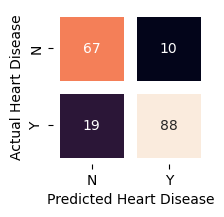

In [235]:
from sklearn.linear_model import LogisticRegression
_ = train_and_evaluate(LogisticRegression(), X, y)


Results from algorithm KNeighborsClassifier():
Mean cross-validation accuracy is 0.704 with SD 0.023

Accuracy on training data is 0.793

Test data metrics: accuracy=0.701, f1=0.729, precision=0.771, recall=0.692


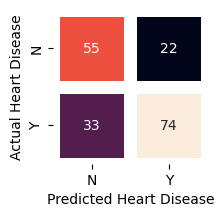

In [236]:
from sklearn.neighbors import KNeighborsClassifier
_ = train_and_evaluate(KNeighborsClassifier(), X, y)


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.781 with SD 0.019

Accuracy on training data is 1.000

Test data metrics: accuracy=0.815, f1=0.833, precision=0.876, recall=0.794


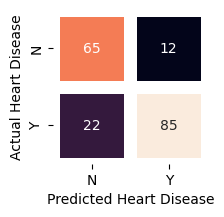

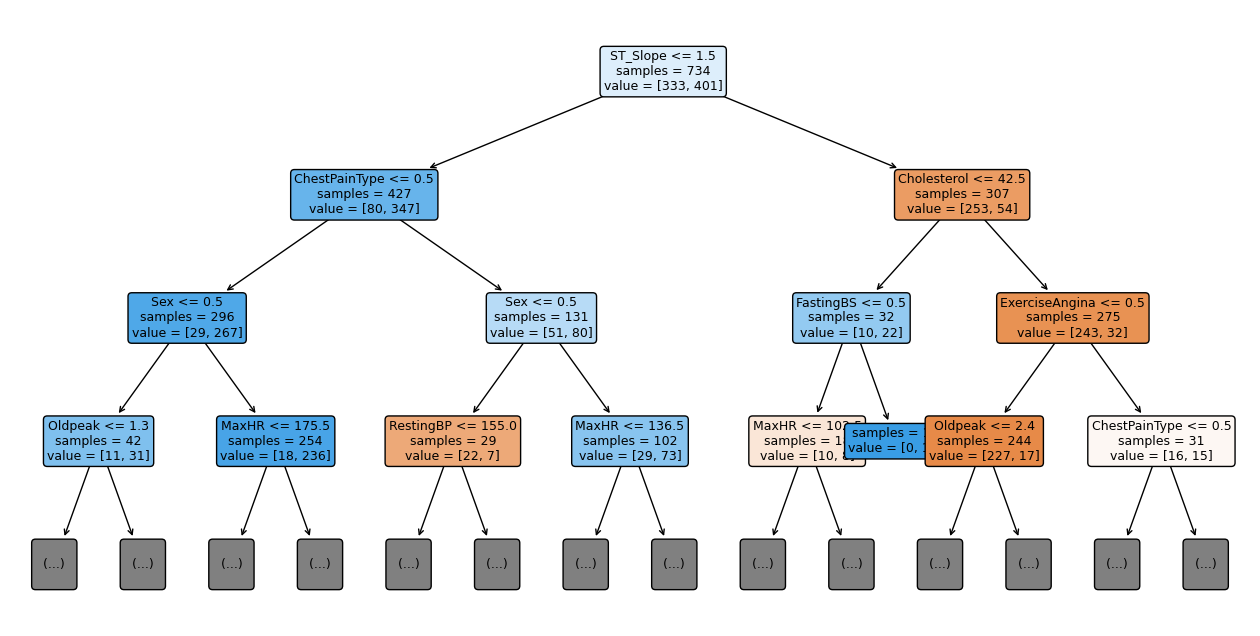

In [237]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
learnt_model = train_and_evaluate(DecisionTreeClassifier(), X, y)
plt.figure(figsize=(16, 8))
plot_tree(learnt_model, max_depth=3, feature_names=X.columns,
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()